In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [85]:
df = pd.read_csv('iris_working.csv', header =None,
                names = ['sepal_length(cm)', 'sepal_width(cm)', 'petal_length(cm)','petal_width(cm)','class'])
##https://stackoverflow.com/questions/34091877/how-to-add-header-row-to-a-pandas-dataframe
df['color'] ='set'
for i in range(0,len(df)):
    if df.loc[i,'class'] == 'Iris-setosa':
        df.loc[i,'color'] = 'red'
    elif df.loc[i,'class'] == 'Iris-virginica':
        df.loc[i,'color'] = 'blue'
    elif df.loc[i,'class'] == 'Iris-versicolor':
        df.loc[i,'color'] = 'green'

In [84]:
df.head()

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),class,color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal_length(cm)    150 non-null float64
sepal_width(cm)     150 non-null float64
petal_length(cm)    150 non-null float64
petal_width(cm)     150 non-null float64
class               150 non-null object
color               150 non-null object
dtypes: float64(4), object(2)
memory usage: 7.1+ KB


In [87]:
df.describe()

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [46]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

# Univariate Analysis

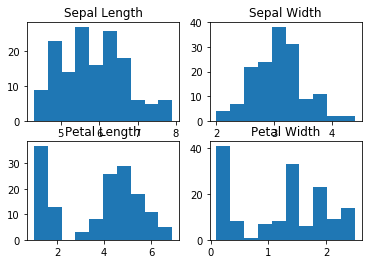

In [88]:
plt.hist(df['sepal_length(cm)'])

plt.subplot(2,2,1)
plt.hist(df['sepal_length(cm)'])
plt.title('Sepal Length')

plt.subplot(2,2,2)
plt.hist(df['sepal_width(cm)'])
plt.title('Sepal Width')

plt.subplot(2,2,3)
plt.hist(df['petal_length(cm)'])
plt.title('Petal Length')

plt.subplot(2,2,4)
plt.hist(df['petal_width(cm)'])
plt.title('Petal Width')

What do each look like if we break it up by class? Petal width looks to have a few distinct points. 

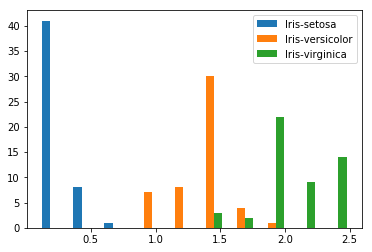

In [48]:
class_list = df['class'].unique()
var = 'petal_width(cm)'

hs1 = df[df['class']==class_list[0]][var]
hs2 = df[df['class']==class_list[1]][var]
hs3 = df[df['class']==class_list[2]][var]
plt.hist([hs1,hs2,hs3])

plt.legend(class_list)

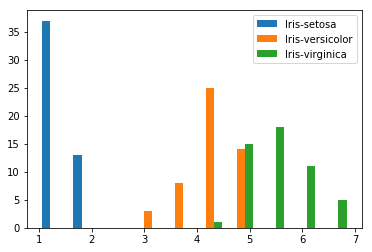

In [49]:
var = 'petal_length(cm)'

hs1 = df[df['class']==class_list[0]][var]
hs2 = df[df['class']==class_list[1]][var]
hs3 = df[df['class']==class_list[2]][var]
plt.hist([hs1,hs2,hs3])

plt.legend(class_list)

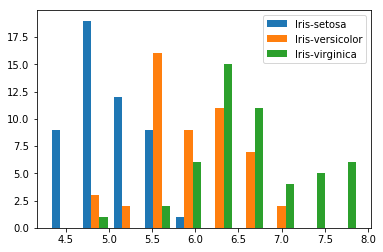

In [50]:
var = 'sepal_length(cm)'

hs1 = df[df['class']==class_list[0]][var]
hs2 = df[df['class']==class_list[1]][var]
hs3 = df[df['class']==class_list[2]][var]
plt.hist([hs1,hs2,hs3])

plt.legend(class_list)

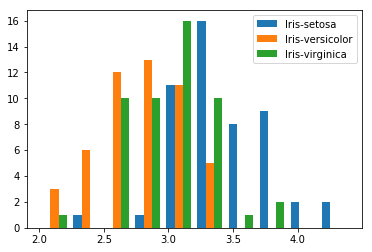

In [51]:
var = 'sepal_width(cm)'

hs1 = df[df['class']==class_list[0]][var]
hs2 = df[df['class']==class_list[1]][var]
hs3 = df[df['class']==class_list[2]][var]
plt.hist([hs1,hs2,hs3])

plt.legend(class_list)

It looks like the petals are very distinct in their lengths and widths to separate between the three classes. Sepal length also distinguishes well, but there are some overlaps. Sepal Width is more difficult to distinguish between the classes.

# Bivariate Analysis

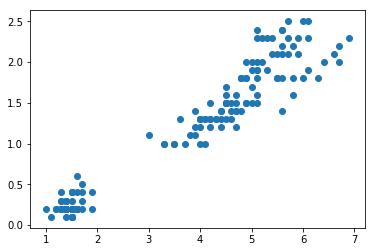

In [118]:
fig, ax = plt.subplots()
ax.scatter(df['petal_length(cm)'], df['petal_width(cm)'])

Quick visualization on petal length vs width shows a distinct separation but of which?

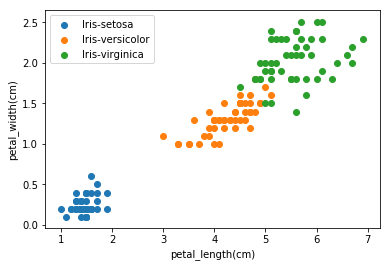

In [135]:
v1 = 'petal_length(cm)'
v2 = 'sepal_length(cm)'
v3 = 'petal_width(cm)'
v4 = 'sepal_width(cm)'


groups = df.groupby('class')

fig, ax = plt.subplots()

for name, group in groups:
    ax.scatter(group[v1], group[v3], label = name)
ax.legend()
plt.xlabel(v1)
plt.ylabel(v3)

plt.show()

It's clear that the iris-setosa class is very distinct from the others regardless of what variables we use. However, iris-versicolor and iris-virginica are very similar. petal_length and petal_width seem to be the most distinct way to determine which is which. 